In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [59]:
class BinaryClassifierEvaluator:
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.results = None
        self.best_classifier = None
    
    def evaluate(self, X, y, test_size=0.2, random_state=42):
        # Split the dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        # Perform grid search for each classifier and store results
        results = []
        for classifier in self.classifiers:
            gs = GridSearchCV(classifier['model'], classifier['params'], scoring='roc_auc', cv=5,verbose=2)
            gs.fit(X_train, y_train)
            best_estimator = gs.best_estimator_
            y_pred = best_estimator.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_pred)
            auc_score = auc(fpr, tpr)
            results.append({'Classifier': classifier['name'], 'Best Estimator': best_estimator, 'AUC': auc_score})
        
        # Store results and best classifier
        self.results = pd.DataFrame(results)
        self.best_classifier = self.results.loc[self.results['AUC'].idxmax()]
    
    def plot_roc_curve(self):
        if self.best_classifier is None:
            print("No best classifier found. Please run evaluate() first.")
            return
        
        X_test = self.X_test
        y_test = self.y_test
        
        y_pred = self.best_classifier['Best Estimator'].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

In [60]:
X_train = pd.read_csv('x_train.csv',header=None)
X_train.info()
Y_train = pd.read_csv('y_train.csv',header=None,usecols=[1])
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9464 entries, 0 to 9463
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9464 non-null   float64
 1   1       9464 non-null   float64
 2   2       9464 non-null   float64
 3   3       9464 non-null   float64
 4   4       9464 non-null   float64
 5   5       9464 non-null   float64
 6   6       9464 non-null   float64
 7   7       9464 non-null   float64
 8   8       9464 non-null   float64
 9   9       9464 non-null   float64
 10  10      9464 non-null   float64
 11  11      9464 non-null   float64
 12  12      9464 non-null   float64
 13  13      9464 non-null   float64
 14  14      9464 non-null   float64
 15  15      9464 non-null   float64
 16  16      9464 non-null   float64
 17  17      9464 non-null   float64
 18  18      9464 non-null   float64
 19  19      9464 non-null   float64
 20  20      9464 non-null   float64
 21  21      9464 non-null   float64
 22  

In [61]:
scaler =StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

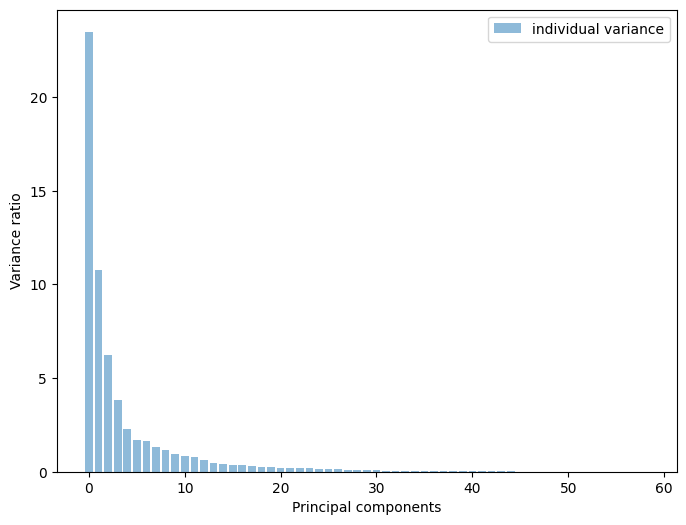

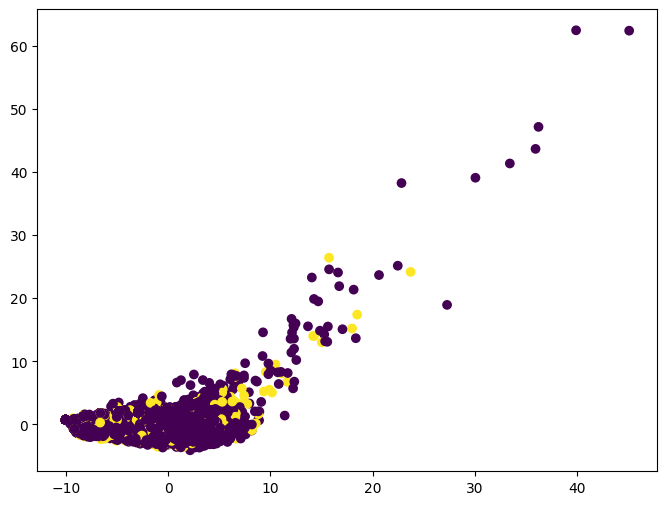

In [62]:
pca = PCA()
copy_ADCTL_train = X_train.copy()
copy_ADCTL_train_labels = Y_train.copy()

pca.fit_transform(copy_ADCTL_train,copy_ADCTL_train_labels)
pca_variance = pca.explained_variance_

#print(len(pca_variance))

plt.figure(figsize=(8, 6))
plt.bar(range(59), pca_variance[0:59], alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

pca2 = PCA(n_components=30)
pca2.fit(copy_ADCTL_train)
x_3d = pca2.transform(copy_ADCTL_train)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,2],c=copy_ADCTL_train_labels)
plt.show()

In [15]:
X_train = pd.read_csv('x_97train.csv',header=None)
Y_train = pd.read_csv('y_97train.csv',header=None,usecols=[1])
X_test = pd.read_csv('x_97test.csv',header=None)
Y_test = pd.read_csv('y_97test.csv',header=None,usecols=[1])
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4875 non-null   float64
 1   1       4875 non-null   float64
 2   2       4875 non-null   float64
 3   3       4875 non-null   float64
 4   4       4875 non-null   float64
 5   5       4875 non-null   float64
 6   6       4875 non-null   float64
 7   7       4875 non-null   float64
 8   8       4875 non-null   float64
 9   9       4875 non-null   float64
 10  10      4875 non-null   float64
 11  11      4875 non-null   float64
 12  12      4875 non-null   float64
 13  13      4875 non-null   float64
 14  14      4875 non-null   float64
 15  15      4875 non-null   float64
 16  16      4875 non-null   float64
 17  17      4875 non-null   float64
 18  18      4875 non-null   float64
 19  19      4875 non-null   float64
 20  20      4875 non-null   float64
 21  21      4875 non-null   float64
 22  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4875 non-null   float64
 1   1       4875 non-null   float64
 2   2       4875 non-null   float64
 3   3       4875 non-null   float64
 4   4       4875 non-null   float64
 5   5       4875 non-null   float64
 6   6       4875 non-null   float64
 7   7       4875 non-null   float64
 8   8       4875 non-null   float64
 9   9       4875 non-null   float64
 10  10      4875 non-null   float64
 11  11      4875 non-null   float64
 12  12      4875 non-null   float64
 13  13      4875 non-null   float64
 14  14      4875 non-null   float64
 15  15      4875 non-null   float64
 16  16      4875 non-null   float64
 17  17      4875 non-null   float64
 18  18      4875 non-null   float64
 19  19      4875 non-null   float64
 20  20      4875 non-null   float64
 21  21      4875 non-null   float64
 22  